In [1]:
# Read in the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

song_data = pd.read_csv('data/song_data.csv')

In [2]:
'''using the average we can make model like linear regression, decision tree, or forest

cleared_data = pd.read_csv('song_data.csv').drop(columns=['track_id', 'key']).dropna(how='any')

cleared_data['popularity'] = cleared_data['popularity'].apply(lambda x: 'popular' if x > 75 else 'not_popular')

# Convert True to 1 and False to 0 in the "popularity" column
cleared_data['explicit'] = cleared_data['explicit'].astype(int)

# Remove duplicates based on track name
cleared_data = cleared_data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
cleared_data['duration_s'] = cleared_data['duration_ms'] / 1000

# List of columns you want to keep
columns_to_keep = ['popularity','duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

columns_to_get_mean = ['duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Filtering columns
cleared_data = cleared_data[columns_to_keep]

# Reshape the data to long format
long_data = pd.melt(cleared_data, id_vars=['popularity'], var_name='feature', value_name='value')

# Calculate the mean for each feature and diagnosis
means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()

# Reshape the data back to wide format
wide_means = means.pivot(index='feature', columns='popularity', values='value')

# Print the result
print(wide_means)

# create a blx plot
# Create a box plot
sns.set(style="whitegrid")
g = sns.FacetGrid(long_data, col='feature', col_wrap=2, margin_titles=True,
                  xlim=(long_data['value'].min(), long_data['value'].max()))
g.map(sns.boxplot, 'value', 'popularity', 'popularity', order=['popular', 'not_popular'],
      hue_order=['popular', 'not_popular'], palette={"popular": "tomato", "not_popular": "cyan"})
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()  # Remove the legend
plt.show()
'''

'using the average we can make model like linear regression, decision tree, or forest\n\ncleared_data = pd.read_csv(\'song_data.csv\').drop(columns=[\'track_id\', \'key\']).dropna(how=\'any\')\n\ncleared_data[\'popularity\'] = cleared_data[\'popularity\'].apply(lambda x: \'popular\' if x > 75 else \'not_popular\')\n\n# Convert True to 1 and False to 0 in the "popularity" column\ncleared_data[\'explicit\'] = cleared_data[\'explicit\'].astype(int)\n\n# Remove duplicates based on track name\ncleared_data = cleared_data.drop_duplicates(subset=[\'track_name\'])\n\n# Convert milliseconds to seconds\ncleared_data[\'duration_s\'] = cleared_data[\'duration_ms\'] / 1000\n\n# List of columns you want to keep\ncolumns_to_keep = [\'popularity\',\'duration_s\', \'explicit\', \'danceability\', \'energy\', \'loudness\', \'speechiness\',\n                   \'acousticness\', \'instrumentalness\', \'liveness\', \'valence\', \'tempo\']\n\ncolumns_to_get_mean = [\'duration_s\', \'explicit\', \'danceabilit

In [3]:
song_data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [4]:
"""
Looking at the table above.
Popularity, duration, key, loudness, tempo and time_signature have occurences that go beyond the range of 0-1.
25% of values in instrumentalness are less than or equal to 0 so we can impute. They are predominantly instrumental
75% of values in mode are equal to 1, mode may be dropped from the feature selection process as it conveys litle information about individual tracks
"""

'\nLooking at the table above.\nPopularity, duration, key, loudness, tempo and time_signature have occurences that go beyond the range of 0-1.\n25% of values in instrumentalness are less than or equal to 0 so we can impute. They are predominantly instrumental\n75% of values in mode are equal to 1, mode may be dropped from the feature selection process as it conveys litle information about individual tracks\n'

In [5]:
track_count = len(song_data.track_name.unique())
track_count

73609

In [6]:
# find duplicates
duplicate_rows = song_data[song_data.duplicated(['track_name'])]
len(duplicate_rows)

40391

In [7]:
# drop duplicates
song_data = song_data.drop_duplicates(subset=['track_name'])
song_data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.1710,...,-15.668,1,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3,world-music
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


#### Genre Analysis 

In [8]:
genres = song_data.track_genre.unique()
len(genres)

113

/var/folders/wr/svzmgkks5q13hzsr_6sq82m40000gn/T/ipykernel_6289/775780864.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_popularity, x='track_genre', y='popularity', order=sorted_genres, palette='rainbow')


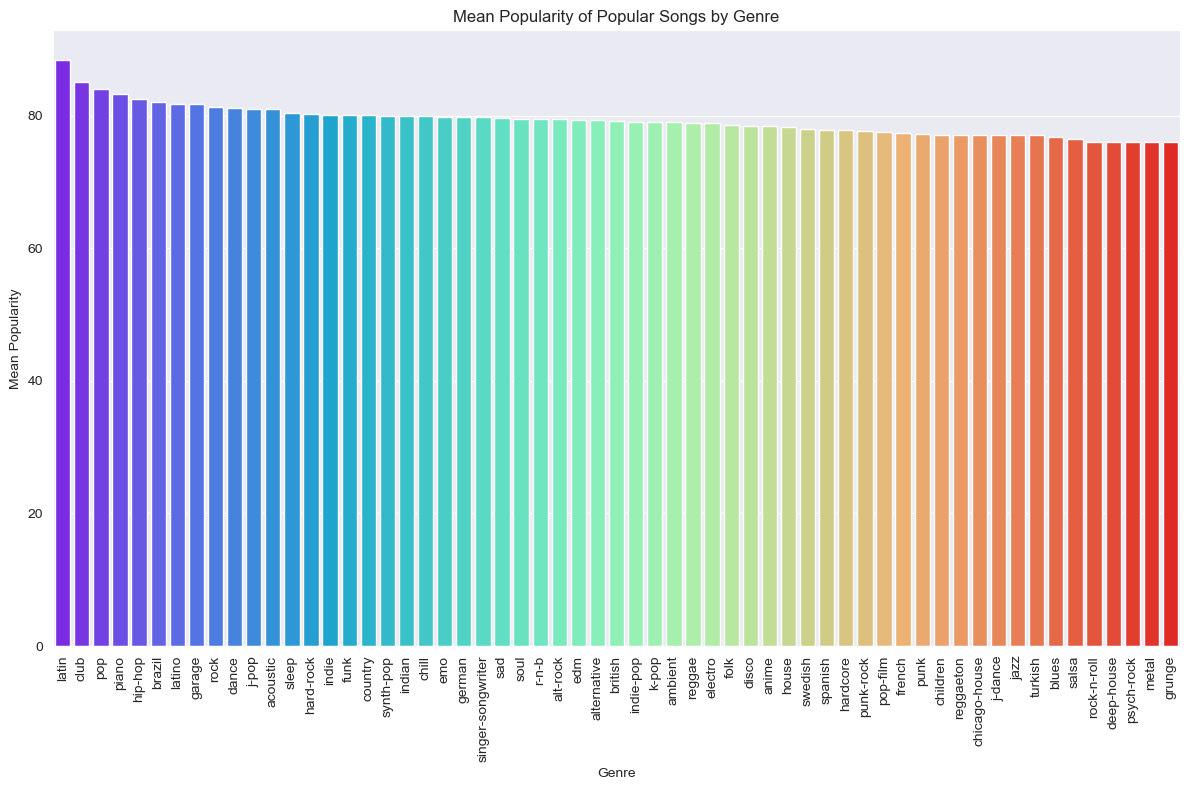

In [9]:
# Filter popular songs
popular_songs = song_data[song_data['popularity'] > 75]

# Group by genre and calculate mean popularity
genre_popularity = popular_songs.groupby('track_genre')['popularity'].mean().reset_index()

# Sort genres by popularity
sorted_genres = genre_popularity.sort_values(by='popularity', ascending=False)['track_genre']

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_popularity, x='track_genre', y='popularity', order=sorted_genres, palette='rainbow')

plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity of Popular Songs by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [10]:
# Filter popular songs with the genre
club_genre_songs = popular_songs[popular_songs['track_genre'] == 'house']

# Calculate the mean popularity for the genre
mean_popularity_club_genre = club_genre_songs['popularity'].mean()

print("Mean popularity for the genre:", mean_popularity_club_genre)

Mean popularity for the genre: 78.3


In [11]:
"""
Look into more songs in the genres with the highest count to discover popular and trending tracks.
Black metal, comedy and Afrobeats have the highest frequencies.

"""
# for exact numbers
genre_count = song_data['track_genre'].value_counts()
genre_count

black-metal    981
comedy         965
afrobeat       945
heavy-metal    944
cantopop       935
              ... 
reggae         142
rock           116
house           98
indie           93
reggaeton       56
Name: track_genre, Length: 113, dtype: int64

#### Genre Vs Dancebility (or any other feature) with popular songs being > 75

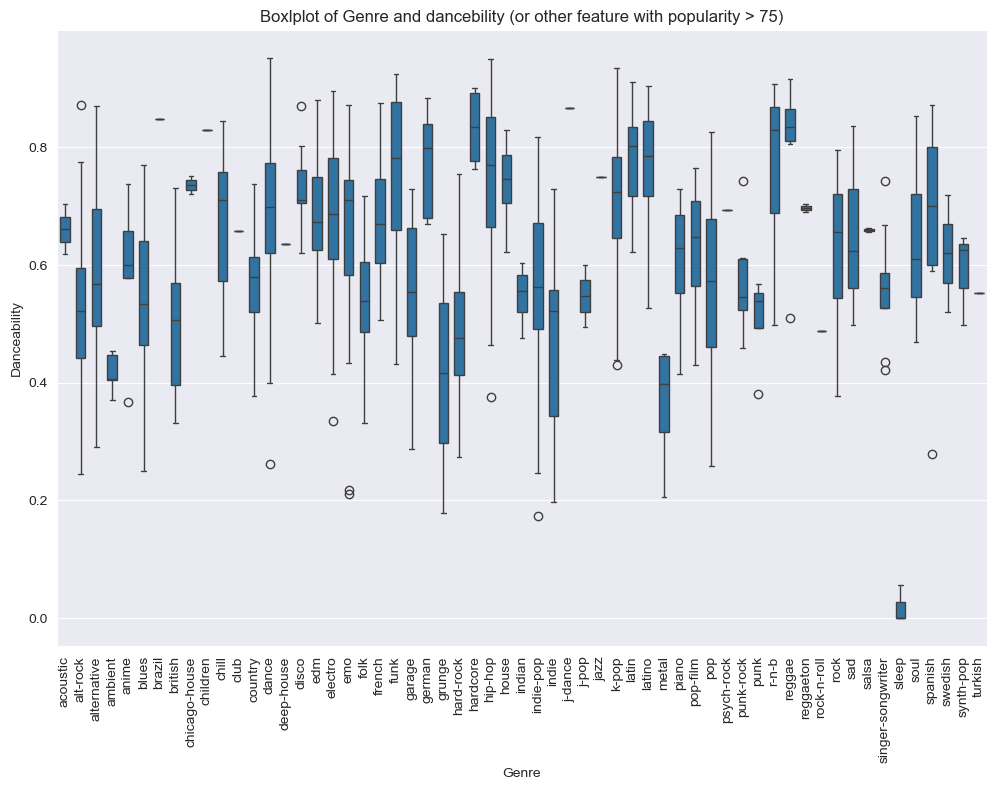

In [12]:

plt.figure(figsize=(12, 8))
    
sns.boxplot(data=popular_songs, x='track_genre', y='danceability', width=0.6)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.title('Boxlplot of Genre and dancebility (or other feature with popularity > 75)')
plt.xticks(rotation=90)
plt.show()


In [13]:
"""
interpret boxplot:
genres with low dancibility 
genres with high dancibility 
can do with other features too

maybe drop irrelevent genres
"""

'\ninterpret boxplot:\ngenres with low dancibility \ngenres with high dancibility \ncan do with other features too\n\nmaybe drop irrelevent genres\n'

#### Audio

In [14]:
# instrumentalness
count = song_data['instrumentalness'].value_counts()[0]
count

23777

In [15]:
# replce 0 with means
song_data['instrumentalness'] = song_data['instrumentalness'].replace(0, song_data['instrumentalness'].mean())
print(song_data['instrumentalness'])

0         0.000001
1         0.000006
2         0.184374
3         0.000071
4         0.184374
            ...   
113994    0.022900
113995    0.928000
113996    0.976000
113997    0.184374
113999    0.184374
Name: instrumentalness, Length: 73609, dtype: float64


In [16]:
# convert explicit to boolean -  where 0 is False and 1 is True
song_data['explicit'] = song_data['explicit'].astype(int)
song_data['explicit']
explicit_tracks = song_data[song_data['explicit'] == 1]
print(explicit_tracks.head(10)) 

     Unnamed: 0                track_id                        artists  \
59           59  2gRKq9rIC5i1zuxp06zJWH               Chord Overstreet   
243         243  3M6NL7PxIDZ3ArfPrBUTUP                    Days N Daze   
247         247  5DUAKXpyv3nL50PnAQbPS0                       Get Dead   
284         284  0njuNwIyB3DoBHC0SFUkOr           Andrew Foy;Renee Foy   
298         298  1MGIxsVtqK2npdPmI8Dj0D                    Days N Daze   
399         399  42mkE3wbofBNickLHgdVlo                       Get Dead   
446         446  0YG5wOXVpvNUyPihvr1zsa  Days N Daze;Freddie Boatright   
489         489  353rT3h7ABEWWBe6Hr7EZD                    Days N Daze   
491         491  5hhhrZMKz1NEZM7jRWufbf                   Frank Turner   
493         493  7EcFRiCKqijYsuA5UbNnQZ                   Frank Turner   

                  album_name                track_name  popularity  \
59        What's Left of You        What's Left of You          57   
243  Show Me the Blueprints.               Fl

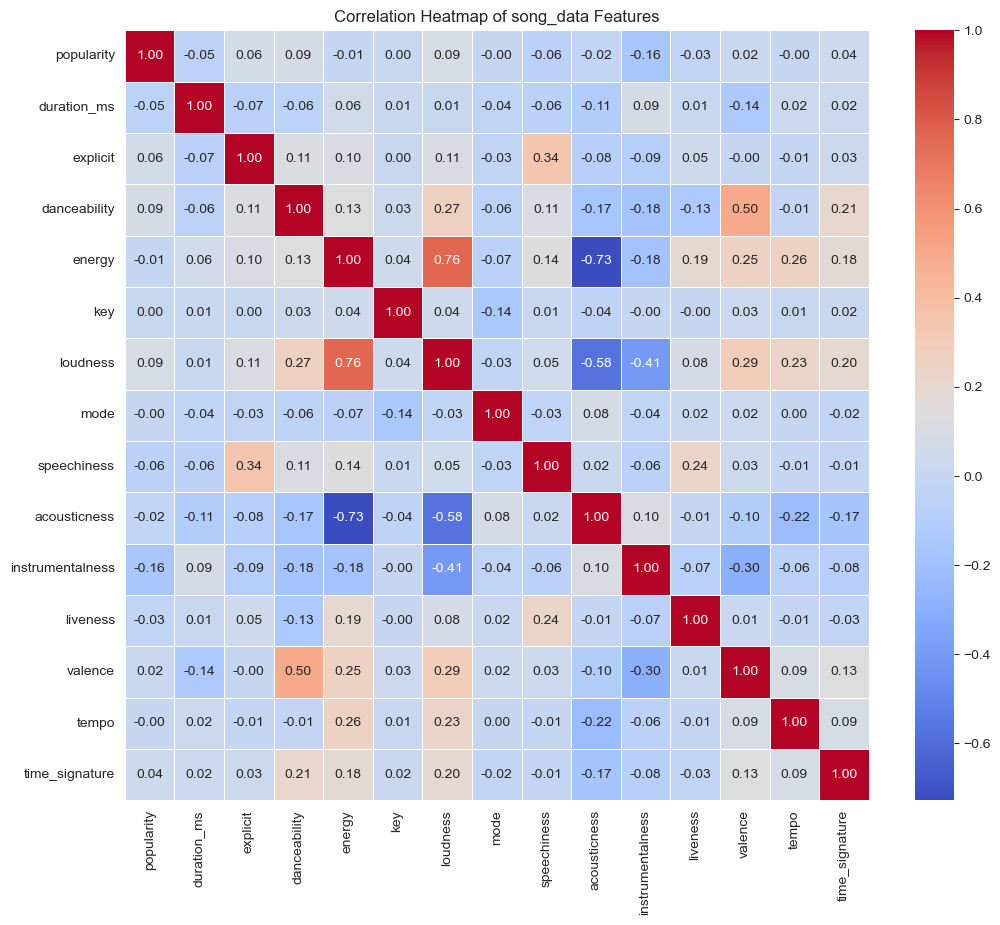

In [17]:
# Corrlation heat map
# Drop unnecessary columns
columns_to_keep = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'] # To remove each of the columns that aren't float/int64 values, along with the song index values
song_data = song_data[columns_to_keep]
song_data_df = song_data

# Calculate correlation matrix
correlation_matrix = song_data_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of song_data Features')
plt.show()

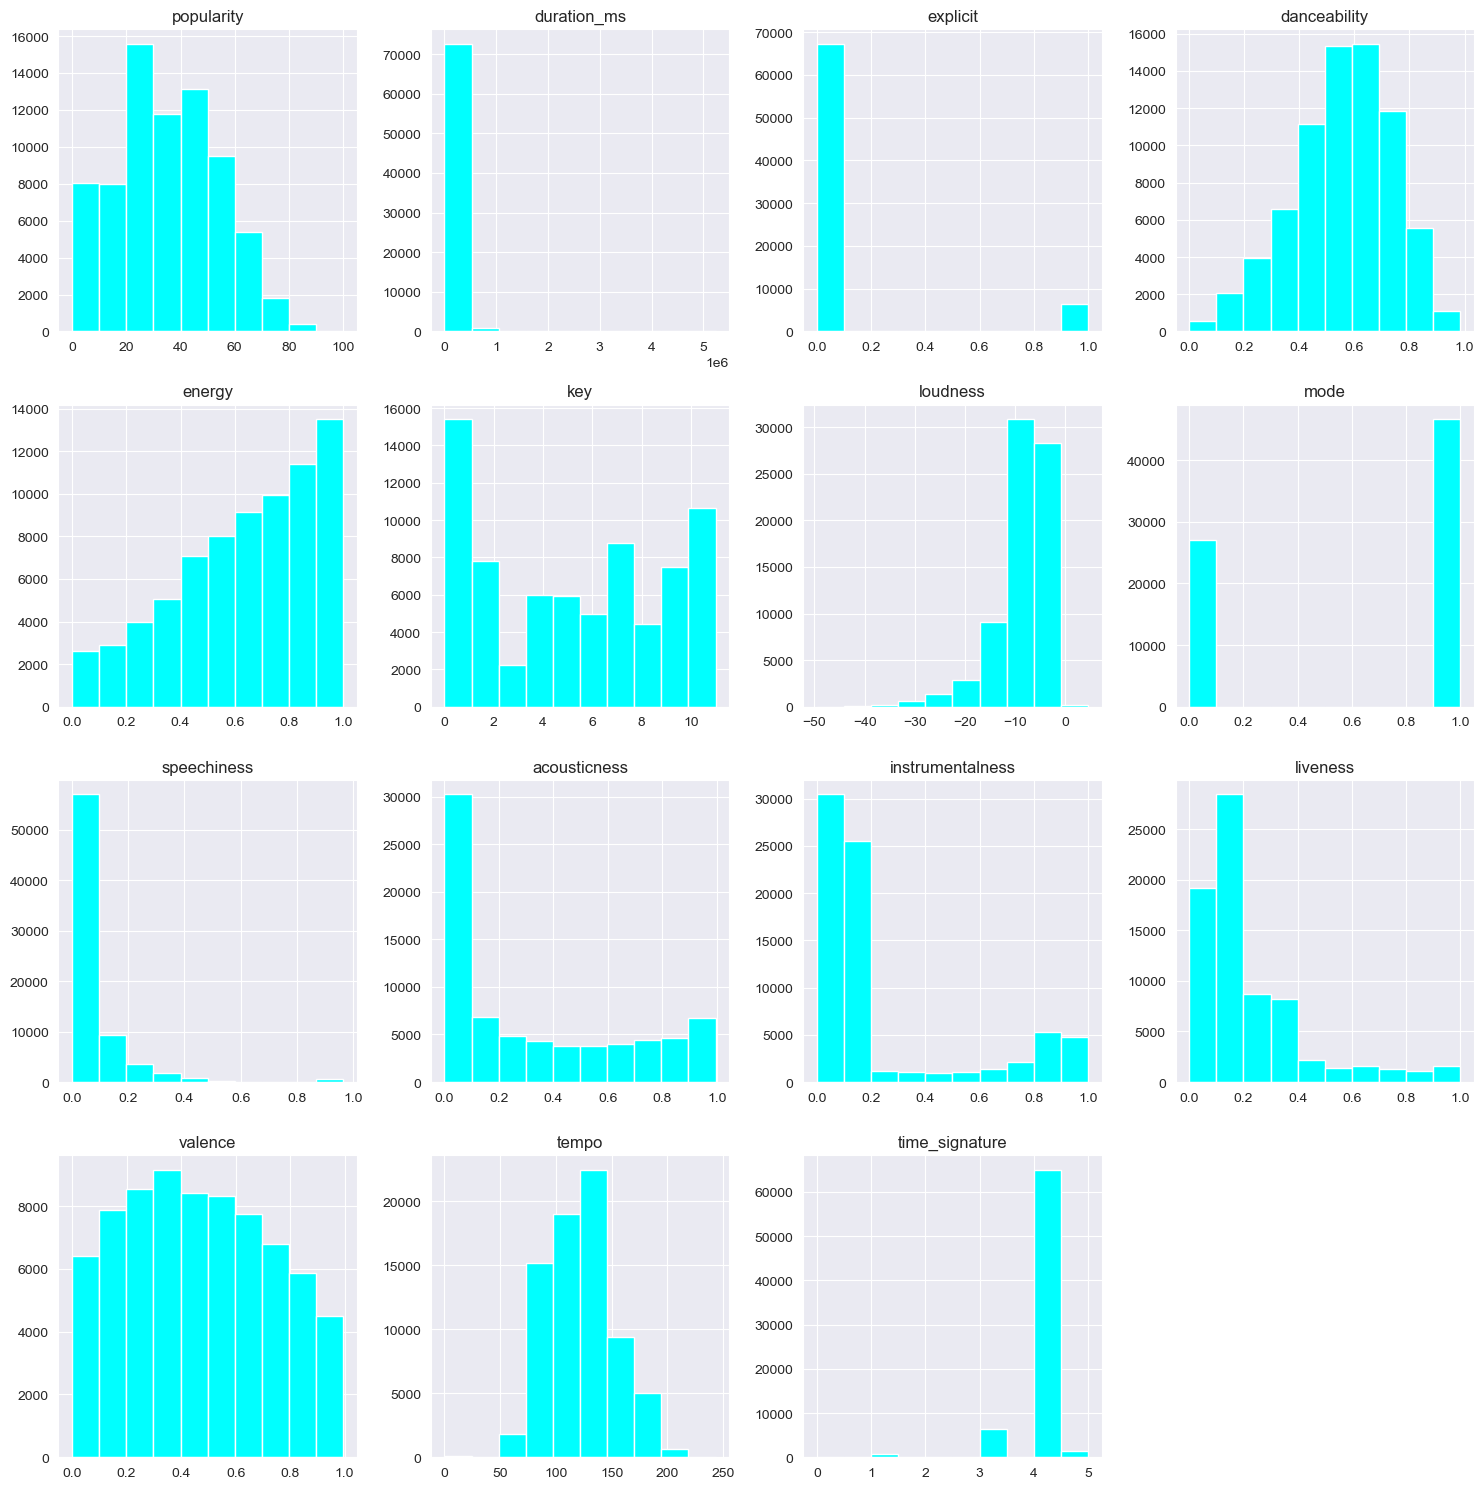

In [18]:
# histograms to analyze each audio feature
song_data.hist(figsize=(15, 15), color = 'cyan')
plt.tight_layout()
plt.show()

The 'duration' distribution is also not uniform across the data and can be dropped.

The 'explicit' distribution is again discrete, and since most of the songs are non-explicit, we can drop this feature.

Most of the distributions are skewed and hence a suitable scaling technique is required for processing the dataset.

In [19]:
song_data = song_data.drop(['duration_ms'], axis =1)

In [20]:
# individual correlation with popularity
import numpy as np
from yellowbrick.target.feature_correlation import feature_correlation

# Drop non-numeric or irrelevant columns
X = song_data.drop(['popularity', 'track_genre'], axis=1)
y = song_data['popularity']

feature_names = X.columns.tolist()

visualizer = feature_correlation(X.values, y.values, labels=feature_names)
plt.tight_layout()
plt.show()

KeyError: "['track_genre'] not found in axis"

In [ ]:
# scatter plot
from sklearn.linear_model import LinearRegression

def plot_feature(ax, feature_name, X, y, x_label):
    regr = LinearRegression()
    regr.fit(X, y)

    ax.scatter(X, y, alpha=0.5, label=f'{feature_name} vs. Popularity')
    ax.plot(X, regr.predict(X), color="red", linewidth=3)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Popularity")
    ax.set_title("Correlation")

# Create a single figure for all the subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

# List of features and their corresponding column names
features = ["Valence", "Speechiness", "Acousticness", "Liveness", "Energy", "Instrumentalness", "Loudness", "Tempo"]
columns = ["valence", "speechiness", "acousticness", "liveness", "energy", "instrumentalness", "loudness", "tempo"]

for i, feature_name in enumerate(features):
    row, col = divmod(i, 3)
    plot_feature(
        axes[row, col],
        feature_name,
        song_data[[columns[i]]].values,
        song_data["popularity"].values,
        feature_name
    )
plt.show()

In [ ]:
# Robost Scaling - 
# Robust scaling produces a much wider range of values than the standard scaler. 
# Outliers cause the mean and standard deviation to soar to much higher values. 

from sklearn.preprocessing import RobustScaler
# Select the columns to be scaled (exclude 'track_genre')
numeric_columns = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit', 'mode']

# Create a RobustScaler instance
scaler = RobustScaler()

# Apply Robust scaling to the selected columns
song_data[numeric_columns] = scaler.fit_transform(song_data[numeric_columns])

In [ ]:
song_data

In [ ]:
# Clustering by Genre
# Calculate the mean danceability and mean valence for each genre
genre_stats = song_data.groupby('track_genre').agg({'popularity': 'mean'}).reset_index()

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

range_n_clusters = [3, 4, 5, 6, 7]
distortions = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(genre_stats[['popularity']])
    cluster_labels = kmeans.labels_
    
    # calculate distortion
    distortions.append(sum(np.min(cdist(genre_stats[['popularity']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / genre_stats.shape[0])

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Evaluating a KNN with 4-folds instead of 5-folds

# List of columns you want to keep (Including Key)
columns_to_keep = ['popularity', 'duration_s', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
columns_to_get_mean = ['duration_s', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Filtering columns
cleared_data = cleared_data[columns_to_keep]
# Reshape the data to long format
long_data = pd.melt(cleared_data, id_vars=['popularity'], var_name='feature', value_name='value')
# Calculate the mean for each feature and diagnosis
means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()
# Reshape the data back to wide format
wide_means = means.pivot(index='feature', columns='popularity', values='value')


In [ ]:
song_data[columns_to_keep]

## cluster For danceabilty and valence

In [ ]:
genre_stats = song_data.groupby('track_genre').agg({'danceability': 'mean', 'valence': 'mean'}).reset_index()

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
range_n_clusters = [3, 4, 5, 6, 7]
distortions = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(genre_stats[['danceability', 'valence']])
    cluster_labels = kmeans.labels_
    
    # calculate distortion
    distortions.append(sum(np.min(cdist(genre_stats[['danceability', 'valence']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / genre_stats.shape[0])

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Number of clusters (you can adjust this based on your preference)
num_clusters = 5

# Perform K-Means clustering based on mean danceability and mean valence
kmeans = KMeans(n_clusters=num_clusters, random_state=10)
genre_stats['cluster'] = kmeans.fit_predict(genre_stats[['danceability', 'valence']])
custom_cluster_labels = list(range(num_clusters))

# Plot the clusters
plt.scatter(genre_stats['danceability'], genre_stats['valence'], c=genre_stats['cluster'], cmap='rainbow')
plt.xlabel('Mean Danceability')
plt.ylabel('Mean Valence')
plt.title('Clusters of Music Genres Based on Mean Danceability and Mean Valence')
plt.show()

# Display the cluster assignments
print(genre_stats[['track_genre', 'danceability', 'valence', 'cluster']])